<a href="https://colab.research.google.com/github/dhruvvk14/VGGT_Testing/blob/main/VGGT_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing dependencies

In [3]:
!pip install vggt@git+https://github.com/facebookresearch/vggt.git
!pip install open3d

  Cloning https://github.com/facebookresearch/vggt.git to /tmp/pip-install-ng3mjyir/vggt_81409fceacdb48648416f58d2f0c6010
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/vggt.git /tmp/pip-install-ng3mjyir/vggt_81409fceacdb48648416f58d2f0c6010
  Resolved https://github.com/facebookresearch/vggt.git to commit e56963328b7476e615ce8dda9164d381f8dc07a3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


all imports

In [4]:
import torch
from vggt.models.vggt import VGGT
from vggt.utils.load_fn import load_and_preprocess_images
import numpy as np
import open3d as o3d

import the model

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#use float32 cuz no gpu
dtype = torch.float32
model = VGGT.from_pretrained("facebook/VGGT-1B").to(device)


config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.03G [00:00<?, ?B/s]

these are our predictions.

In [7]:
filename = "testing_image.png"
image_names = ["testing_image.png"]
images = load_and_preprocess_images(image_names).to(device)
preds = []
with torch.no_grad():
    with torch.cuda.amp.autocast(dtype=dtype):

        predictions = model(images)
        preds.append(predictions)

/tmp/ipython-input-449150969.py:5: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=dtype):
/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/vggt/models/vggt.py:65: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


tensor stuff.

to be honest, i didn't quite get what this part was.

edit1: turns out my first video was for math/physics, which is completely different...

edit2: its just matrices but the math in nn is quicker idk how tho i wanna research this more ngl

In [8]:
print("Length: ", len(preds))
for predictions in preds:
  print (predictions)

Length:  1
{'pose_enc': tensor([[[ 5.4718e-05,  5.5590e-05,  5.1648e-06, -5.4474e-05, -5.4304e-05,
          -6.1239e-05,  1.0002e+00,  9.4935e-01,  1.1928e+00]]]), 'pose_enc_list': [tensor([[[-3.8696e-05,  3.4049e-05,  1.8905e-04, -8.1628e-05, -1.0261e-04,
           7.6133e-05,  1.0001e+00,  9.5197e-01,  1.1926e+00]]]), tensor([[[ 1.4363e-05,  4.7538e-05,  8.2598e-05, -5.7361e-05, -8.5849e-05,
          -4.7413e-06,  1.0001e+00,  9.5048e-01,  1.1925e+00]]]), tensor([[[ 3.8688e-05,  5.2777e-05,  3.6232e-05, -5.5606e-05, -6.8936e-05,
          -4.1631e-05,  1.0002e+00,  9.4979e-01,  1.1927e+00]]]), tensor([[[ 5.4718e-05,  5.5590e-05,  5.1648e-06, -5.4474e-05, -5.4304e-05,
          -6.1239e-05,  1.0002e+00,  9.4935e-01,  1.1928e+00]]])], 'depth': tensor([[[[[1.3618],
           [1.3583],
           [1.3764],
           ...,
           [1.1950],
           [1.1940],
           [1.1981]],

          [[1.3556],
           [1.3518],
           [1.3679],
           ...,
           [1.1862],

not gonna lie this entire code was GPTed, just wanted to get a visualization of the point-map.

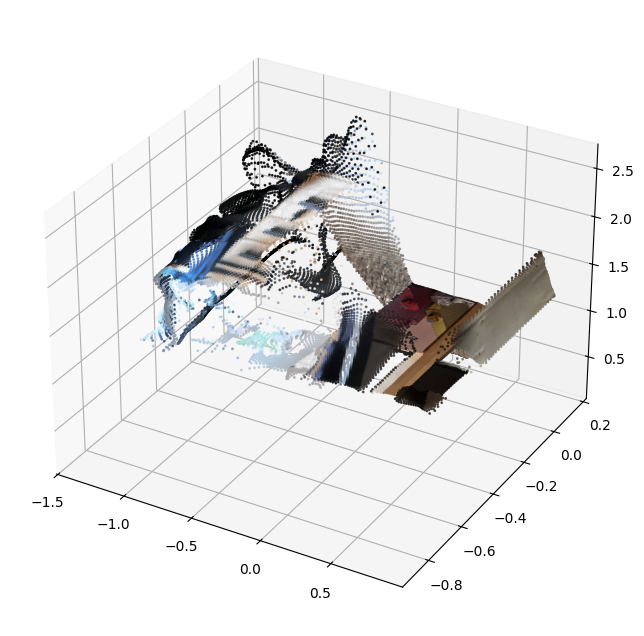

In [31]:
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Take preprocessed image
img_tensor = images[0].permute(1, 2, 0).cpu().numpy()
colors = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())

# 2️⃣ Flatten points & confidence
points = predictions['world_points'].reshape(-1, 3).cpu().numpy()
conf_values = predictions['world_points_conf'].reshape(-1).cpu().numpy()

# 3️⃣ Mask by confidence
threshold = 0
mask = conf_values > threshold
points = points[mask]
colors = colors.reshape(-1, 3)[mask]

# 4️⃣ Optional subsample
points = points[::5]
colors = colors[::5]

# 5️⃣ Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors, alpha=0.8)
plt.show()

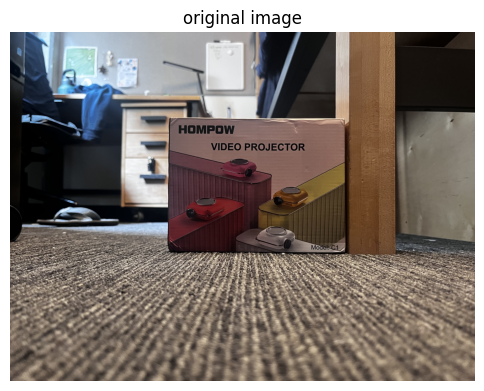

In [10]:
img = Image.open("testing_image.png").convert("RGB")
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("original image")
plt.show()

Processing `testing_image.png`

In [11]:
print(predictions['depth'])

tensor([[[[[1.3618],
           [1.3583],
           [1.3764],
           ...,
           [1.1950],
           [1.1940],
           [1.1981]],

          [[1.3556],
           [1.3518],
           [1.3679],
           ...,
           [1.1862],
           [1.1831],
           [1.1868]],

          [[1.3646],
           [1.3672],
           [1.3818],
           ...,
           [1.1843],
           [1.1767],
           [1.1902]],

          ...,

          [[0.2670],
           [0.2716],
           [0.2728],
           ...,
           [0.2627],
           [0.2625],
           [0.2540]],

          [[0.2497],
           [0.2629],
           [0.2669],
           ...,
           [0.2609],
           [0.2533],
           [0.2400]],

          [[0.2500],
           [0.2443],
           [0.2599],
           ...,
           [0.2520],
           [0.2361],
           [0.2473]]]]])


In [33]:
# Get height and width
shape = predictions['world_points'].shape

H = shape[2]  # should be 392
W = shape[3]  # 518

v_center = H // 2  # should be196
u_center = W // 2  # 259
print(f"Center pixel: (u={u_center}, v={v_center})")

center_point = predictions['world_points'][0, 0, v_center, u_center]  # [x, y, z]
depth_z = center_point[2].item()
print(f"Depth at center pixel: {depth_z:.3f} m")





Center pixel: (u=259, v=196)
Depth at center pixel: 0.936 m
